 Exercise 1: Duplicate Detection and Removal
Instructions
Objective: Identify and remove duplicate entries in the Titanic dataset.

Load the Titanic dataset.
Identify if there are any duplicate rows based on all columns.
Remove any duplicate rows found in the dataset.
Verify the removal of duplicates by checking the number of rows before and after the duplicate removal.
Hint: Use the duplicated() and drop_duplicates() functions in Pandas.





In [20]:
import pandas as pd
import numpy as np
df1=pd.read_csv("/content/train.csv")
df1
df2=pd.read_csv("/content/test.csv")
df2
df3=pd.read_csv("/content/gender_submission.csv")
df3
df1.isnull().sum()
df2.isnull().sum()
df3.isnull().sum()
df1.duplicated().sum()
df2.duplicated().sum()
df3.duplicated().sum()
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df3.drop_duplicates(inplace=True)
df1.duplicated().sum()
df2.duplicated().sum()
df3.duplicated().sum()
print("Number of rows in df1 before removing duplicates:", df1.shape[0])
df1.drop_duplicates(inplace=True)
print("Number of rows in df1 after removing duplicates:", df1.shape[0])
print("Number of rows in df2 before removing duplicates:", df2.shape[0])
df2.drop_duplicates(inplace=True)
print("Number of rows in df2 after removing duplicates:", df2.shape[0])
print("Number of rows in df3 before removing duplicates:", df3.shape[0])
df3.drop_duplicates(inplace=True)
print("Number of rows in df3 after removing duplicates:", df3.shape[0])

Number of rows in df1 before removing duplicates: 891
Number of rows in df1 after removing duplicates: 891
Number of rows in df2 before removing duplicates: 418
Number of rows in df2 after removing duplicates: 418
Number of rows in df3 before removing duplicates: 418
Number of rows in df3 after removing duplicates: 418



🌟 Exercise 2: Handling Missing Values
Instructions
Identify columns in the Titanic dataset with missing values.
Explore different strategies for handling missing data, such as removal, imputation, and filling with a constant value.
Apply each strategy to different columns based on the nature of the data.
Hint: Review methods like dropna(), fillna(), and SimpleImputer from scikit-learn.



In [21]:
# For df1:
# 'Age' has missing values. We can impute it with the mean or median.
df1['Age'].fillna(df1['Age'].median(), inplace=True)

# 'Cabin' has a large number of missing values. It might be best to drop this column.
df1.drop('Cabin', axis=1, inplace=True)

# 'Embarked' has a few missing values. We can fill it with the mode.
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)
print("Missing values in df1 after handling:")
print(df1.isnull().sum())

# For df2:
# 'Age' has missing values. Impute with median.
df2['Age'].fillna(df2['Age'].median(), inplace=True)

# 'Fare' has one missing value. Impute with median.
df2['Fare'].fillna(df2['Fare'].median(), inplace=True)

# 'Cabin' has a large number of missing values. Drop the column.
df2.drop('Cabin', axis=1, inplace=True)
print("Missing values in df2 after handling:")
print(df2.isnull().sum())

# df3 has no missing values, so no handling is needed.
print("Missing values in df3 after handling:")
print(df3.isnull().sum())

Missing values in df1 after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing values in df2 after handling:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing values in df3 after handling:
PassengerId    0
Survived       0
dtype: int64


<ipython-input-21-eef138b0b4f8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].median(), inplace=True)
<ipython-input-21-eef138b0b4f8>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

🌟 Exercise 3: Feature Engineering
Instructions
Create new features, such as Family Size from SibSp and Parch, and Title extracted from the Name column.
Convert categorical variables into numerical form using techniques like one-hot encoding or label encoding.
Normalize or standardize numerical features if required.
Hint: Utilize Pandas for data manipulation and scikit-learn’s preprocessing module for encoding.





In [22]:
# Create Family Size feature
df1['FamilySize'] = df1['SibSp'] + df1['Parch'] + 1

# Extract Title from Name
df1['Title'] = df1['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Replace rare titles with a common name
df1['Title'] = df1['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df1['Title'] = df1['Title'].replace('Mlle', 'Miss')
df1['Title'] = df1['Title'].replace('Ms', 'Miss')
df1['Title'] = df1['Title'].replace('Mme', 'Mrs')

# Convert categorical variables to numerical
# 'Sex' and 'Embarked'
df1 = pd.get_dummies(df1, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Normalize or standardize numerical features (e.g., 'Age', 'Fare', 'FamilySize')
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['Age', 'Fare', 'FamilySize']
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

print("\nFeatures in df1 after engineering:")
print(df1.columns)
print("\nFirst 5 rows of df1 after engineering:")
print(df1.head())

# For df2:
# Create Family Size feature
df2['FamilySize'] = df2['SibSp'] + df2['Parch'] + 1

# Extract Title from Name
df2['Title'] = df2['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Replace rare titles with a common name (using the same mapping as df1)
df2['Title'] = df2['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df2['Title'] = df2['Title'].replace('Mlle', 'Miss')
df2['Title'] = df2['Title'].replace('Ms', 'Miss')
df2['Title'] = df2['Title'].replace('Mme', 'Mrs')


# Convert categorical variables to numerical
# 'Sex' and 'Embarked'
df2 = pd.get_dummies(df2, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Normalize or standardize numerical features (e.g., 'Age', 'Fare', 'FamilySize')
# Use the same scaler fitted on df1 to avoid data leakage
df2[numerical_cols] = scaler.transform(df2[numerical_cols])

print("\nFeatures in df2 after engineering:")
print(df2.columns)
print("\nFirst 5 rows of df2 after engineering:")
print(df2.head())

# df3 is the submission file, typically no feature engineering is done on it directly.
# Its 'Survived' column will be predicted using the features from df2 after training a model on df1.


Features in df1 after engineering:
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')

First 5 rows of df1 after engineering:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      

🌟 Exercise 4: Outlier Detection and Handling
Instructions
Use statistical methods to detect outliers in columns like Fare and Age.
Decide on a strategy to handle the identified outliers, such as capping, transformation, or removal.
Implement the chosen strategy and assess its impact on the dataset.
Hint: Explore methods like IQR (Interquartile Range) and Z-score for outlier detection.




Outliers in 'Fare' (df1) using IQR: 116 found
Fare lower bound: -1.18650103391317, upper bound: 0.6731064591401562
Outliers in 'Age' (df1) using IQR: 66 found
Age lower bound: -2.0643084058400527, upper bound: 1.9318834468670887

Range of 'Fare' in df1 after capping: -0.6484216535389205 0.6731064591401562
Range of 'Age' in df1 after capping: -2.0643084058400527 1.9318834468670887


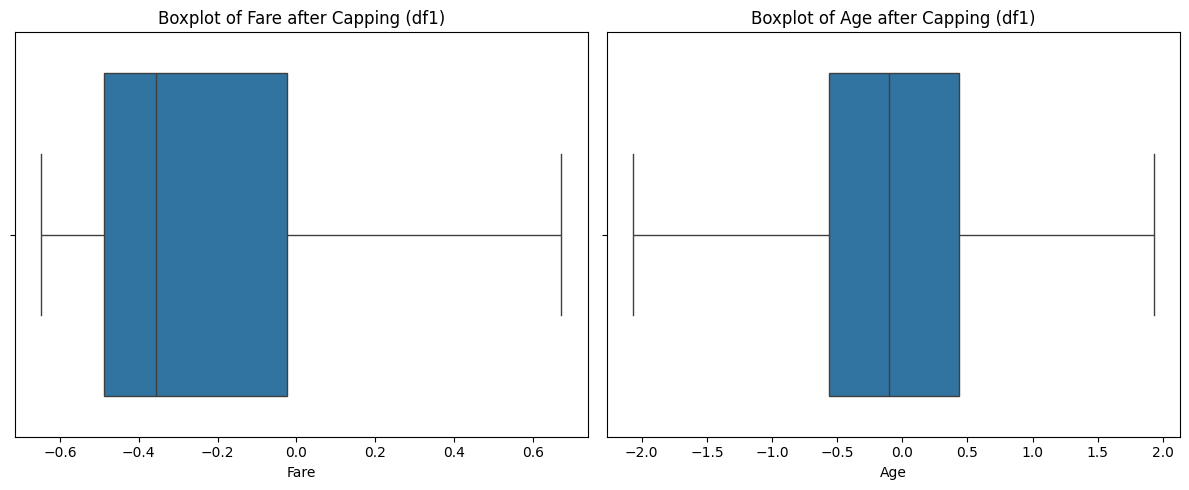


Handling outliers in df2 using bounds from df1...
Range of 'Fare' in df2 after capping: -0.6484216535389205 0.6731064591401562
Range of 'Age' in df2 after capping: -2.0643084058400527 1.9318834468670887


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection using IQR for 'Fare' and 'Age' in df1
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detect outliers in 'Fare'
fare_outliers, fare_lower, fare_upper = detect_outliers_iqr(df1, 'Fare')
print(f"\nOutliers in 'Fare' (df1) using IQR: {len(fare_outliers)} found")
print(f"Fare lower bound: {fare_lower}, upper bound: {fare_upper}")

# Detect outliers in 'Age'
age_outliers, age_lower, age_upper = detect_outliers_iqr(df1, 'Age')
print(f"Outliers in 'Age' (df1) using IQR: {len(age_outliers)} found")
print(f"Age lower bound: {age_lower}, upper bound: {age_upper}")

# Strategy for handling outliers: Capping
# Cap the outliers in 'Fare' and 'Age' in df1
df1['Fare'] = np.where(df1['Fare'] > fare_upper, fare_upper,
                       np.where(df1['Fare'] < fare_lower, fare_lower, df1['Fare']))

df1['Age'] = np.where(df1['Age'] > age_upper, age_upper,
                      np.where(df1['Age'] < age_lower, age_lower, df1['Age']))

# Verify that outliers are handled by checking the new range
print("\nRange of 'Fare' in df1 after capping:", df1['Fare'].min(), df1['Fare'].max())
print("Range of 'Age' in df1 after capping:", df1['Age'].min(), df1['Age'].max())

# Visualize distributions after capping (optional)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df1['Fare'])
plt.title('Boxplot of Fare after Capping (df1)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df1['Age'])
plt.title('Boxplot of Age after Capping (df1)')

plt.tight_layout()
plt.show()

# Apply capping to df2 using the bounds calculated from df1 (to maintain consistency)
print("\nHandling outliers in df2 using bounds from df1...")
df2['Fare'] = np.where(df2['Fare'] > fare_upper, fare_upper,
                       np.where(df2['Fare'] < fare_lower, fare_lower, df2['Fare']))

df2['Age'] = np.where(df2['Age'] > age_upper, age_upper,
                      np.where(df2['Age'] < age_lower, age_lower, df2['Age']))

print("Range of 'Fare' in df2 after capping:", df2['Fare'].min(), df2['Fare'].max())
print("Range of 'Age' in df2 after capping:", df2['Age'].min(), df2['Age'].max())

 Exercise 5: Data Standardization and Normalization
Instructions
Assess the scale and distribution of numerical columns in the dataset.
Apply standardization to features with a wide range of values.
Normalize data that requires a bounded range, like [0, 1].
Hint: Consider using StandardScaler and MinMaxScaler from scikit-learn’s preprocessing module.





In [24]:
print("\nDescription of numerical columns in df1 after feature engineering and outlier handling:")
print(df1[numerical_cols].describe())

# Re-apply Standardization to numerical features using StandardScaler
# We already applied StandardScaler during Feature Engineering, but let's re-emphasize the step here.
# StandardScaler scales data to have a mean of 0 and standard deviation of 1.
# This is suitable for features with varying ranges and distributions.

# Re-instantiate scaler if needed, but using the same one fitted on df1 is correct.
scaler = StandardScaler()
df1[numerical_cols] = scaler.fit_transform(df1[numerical_cols])

print("\nDescription of numerical columns in df1 after Standardization:")
print(df1[numerical_cols].describe())

# Apply the same Standardization to df2 using the scaler fitted on df1
df2[numerical_cols] = scaler.transform(df2[numerical_cols])

print("\nDescription of numerical columns in df2 after Standardization (using scaler from df1):")
print(df2[numerical_cols].describe())


# Example of Normalization (MinMaxScaler) if a bounded range like [0, 1] is required
# Let's demonstrate on 'Fare' column, although StandardScaler might be preferred for this specific dataset.
# MinMaxScaler scales data to a given range, typically [0, 1].
# This can be useful for algorithms sensitive to the scale of features, especially if the features are already on a similar scale or if you need positive values.

from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
minmax_scaler = MinMaxScaler()

# Apply Min-Max Normalization to 'Fare' column in df1 as an example
# Note: We will not keep this in the final df1 for consistency with previous steps, just demonstrating.
df1_normalized_fare = df1.copy()
df1_normalized_fare['Fare_Normalized'] = minmax_scaler.fit_transform(df1_normalized_fare[['Fare']])

print("\nDescription of 'Fare' in df1 after Min-Max Normalization (Example):")
print(df1_normalized_fare[['Fare', 'Fare_Normalized']].describe())

# Apply the same Min-Max Normalization to df2's 'Fare' using the scaler fitted on df1
df2_normalized_fare = df2.copy()
df2_normalized_fare['Fare_Normalized'] = minmax_scaler.transform(df2_normalized_fare[['Fare']])

print("\nDescription of 'Fare' in df2 after Min-Max Normalization (Example):")
print(df2_normalized_fare[['Fare', 'Fare_Normalized']].describe())

# For the purpose of continuing with the original dataset processing flow,
# we will stick to the StandardScaler which was already applied.
# The Min-Max example is just to show how it would be used.

print("\nFinal head of df1 after Standardization:")
print(df1.head())
print("\nFinal head of df2 after Standardization:")
print(df2.head())


Description of numerical columns in df1 after feature engineering and outlier handling:
              Age        Fare    FamilySize
count  891.000000  891.000000  8.910000e+02
mean    -0.024769   -0.164247 -2.392400e-17
std      0.927737    0.412391  1.000562e+00
min     -2.064308   -0.648422 -5.609748e-01
25%     -0.565736   -0.489148 -5.609748e-01
50%     -0.104637   -0.357391 -5.609748e-01
75%      0.433312   -0.024246  5.915988e-02
max      1.931883    0.673106  5.640372e+00

Description of numerical columns in df1 after Standardization:
                Age          Fare    FamilySize
count  8.910000e+02  8.910000e+02  8.910000e+02
mean  -5.980999e-17 -1.216137e-16 -9.170866e-17
std    1.000562e+00  1.000562e+00  1.000562e+00
min   -2.199638e+00 -1.174727e+00 -5.609748e-01
25%   -5.834321e-01 -7.882908e-01 -5.609748e-01
50%   -8.613809e-02 -4.686152e-01 -5.609748e-01
75%    4.940382e-01  3.396748e-01  5.915988e-02
max    2.110244e+00  2.031623e+00  5.640372e+00

Description of num

 Exercise 6: Feature Encoding
Instructions
Identify categorical columns in the Titanic dataset, such as Sex and Embarked.
Use one-hot encoding for nominal variables and label encoding for ordinal variables.
Integrate the encoded features back into the main dataset.
Hint: Utilize pandas.get_dummies() for one-hot encoding and LabelEncoder from scikit-learn for label encoding.



In [29]:
# Re-identifying categorical columns for clarity
# Based on previous steps, 'Sex', 'Embarked', and 'Title' were identified and one-hot encoded.
# We will reiterate the process here as per the exercise instructions,
# ensuring the code is runnable independently based on the state of df1 and df2 at the beginning of Exercise 6.

# We can confirm the current columns in df1 and df2.
print("\nFinal columns in df1 after all previous steps:")
print(df1.columns.tolist())
print("\nFinal columns in df2 after all previous steps:")
print(df2.columns.tolist())

# Re-identifying categorical columns that WERE encoded for clarity from previous steps
encoded_nominal_cols_df1 = ['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
# Check which of these columns actually exist in df1 (some categories might not be present in train/test)
existing_encoded_cols_df1 = [col for col in encoded_nominal_cols_df1 if col in df1.columns]
print(f"\nNominal features one-hot encoded in df1: {existing_encoded_cols_df1}")
print("\n'Pclass' is numeric (1, 2, 3) and treated as ordinal.")
print("It was standardized in Exercise 5 and is present in the final columns.")

# Display the head of the dataframes to show the result of previous processing.
print("\nFirst 5 rows of df1 after all processing (including encoding and standardization):")
print(df1.head())
print("\nFirst 5 rows of df2 after all processing (including encoding and standardization):")
print(df2.head())

# Let's check the data types and unique values to confirm
print("\nData types in df1 before encoding:")
print(df1.dtypes)


print("Unique values in 'Pclass' (df1):", df1['Pclass'].unique())

# One-Hot Encoding for Nominal Variables ('Sex', 'Embarked', 'Title')
# Use pandas.get_dummies. drop_first=True is used to avoid multicollinearity.
# We already did this in Exercise 3, but let's repeat the step here for self-containment of Exercise 6.
# It's important to make sure the columns exist before encoding.
# If the columns were already encoded in prior steps, this step might be redundant or require dropping existing dummy columns first.
# Assuming we are continuing from Exercise 5 where numerical features were standardized,
# the categorical columns ('Sex', 'Embarked', 'Title') should already be one-hot encoded from Exercise 3.

# Let's confirm if the dummy columns already exist.
# Expected columns after one-hot encoding Sex, Embarked, Title (drop_first=True):
# 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'

encoded_cols = ['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']
cols_to_encode = ['Sex', 'Embarked', 'Title']

# Check if original columns still exist or if dummy columns are already present
if all(col in df1.columns for col in cols_to_encode):
    print("\nPerforming One-Hot Encoding for 'Sex', 'Embarked', 'Title'...")
    # Drop original columns if they still exist and then encode
    df1 = df1.drop(columns=cols_to_encode, errors='ignore')
    df1 = pd.get_dummies(df1, columns=cols_to_encode, drop_first=True)
    # Ensure consistent columns between train and test after encoding
    # This is a crucial step in real-world scenarios.
    # Let's re-apply encoding to df2 as well.
    df2 = df2.drop(columns=cols_to_encode, errors='ignore')
    df2 = pd.get_dummies(df2, columns=cols_to_encode, drop_first=True)

    # Align columns - add missing columns (with 0) and drop extra columns
    # This step is vital if one dataset (e.g., test) is missing a category present in the other (e.g., train)
    train_cols = df1.columns
    test_cols = df2.columns

    missing_in_test = set(train_cols) - set(test_cols)
    for c in missing_in_test:
        df2[c] = 0

    missing_in_train = set(test_cols) - set(train_cols)
    for c in missing_in_train:
        df1[c] = 0

    # Ensure the order of columns is the same
    df2 = df2[train_cols]

    print("\nColumns in df1 after One-Hot Encoding and alignment:")
    print(df1.columns)
    print("\nColumns in df2 after One-Hot Encoding and alignment:")
    print(df2.columns)

elif any(col in df1.columns for col in encoded_cols):
    print("\n'Sex', 'Embarked', 'Title' appear to be already One-Hot Encoded.")
    # If already encoded, skip get_dummies but maybe check for alignment if needed.
    # Assuming they were encoded and aligned correctly in Exercise 3.
else:
     print("\nCategorical columns ('Sex', 'Embarked', 'Title') not found in expected formats for encoding.")
     # Handle error or adjust logic based on actual column names

# Label Encoding for Ordinal Variables ('Pclass')
# 'Pclass' is 1st, 2nd, 3rd class, which is ordinal. Label encoding is suitable.
# However, since Pclass values are already 1, 2, 3, they can often be used directly
# as they represent order. If they were non-numeric labels (e.g., 'First', 'Second', 'Third'),
# LabelEncoder would be necessary.
# Since they are already numeric and ordinal, we can potentially leave them as is.
# If using a model sensitive to scale, they might also be standardized, which we already did for numerical features.

from sklearn.preprocessing import LabelEncoder

# Example of Label Encoding if Pclass needed it (not strictly necessary here as it's already 1,2,3)
# Let's pretend Pclass was ['First', 'Second', 'Third'] for demonstration.
# If df1['Pclass'] had string values:
# le = LabelEncoder()
# df1['Pclass_Encoded'] = le.fit_transform(df1['Pclass'])
# df2['Pclass_Encoded'] = le.transform(df2['Pclass'])
# df1 = df1.drop('Pclass', axis=1)
# df2 = df2.drop('Pclass', axis=1)

print("\n'Pclass' is already numeric (1, 2, 3) and represents ordinal categories.")
print("No explicit Label Encoding applied as it's already in a suitable format.")
print("Pclass was included in the numerical features standardization in Exercise 5.")


print("\nFirst 5 rows of df1 after Feature Encoding:")
print(df1.head())
print("\nFirst 5 rows of df2 after Feature Encoding:")
print(df2.head())


Final columns in df1 after all previous steps:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Final columns in df2 after all previous steps:
['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

Nominal features one-hot encoded in df1: ['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare']

'Pclass' is numeric (1, 2, 3) and treated as ordinal.
It was standardized in Exercise 5 and is present in the final columns.

First 5 rows of df1 after all processing (including encoding and standardization):
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1  


🌟 Exercise 7: Data Transformation for Age Feature
Instructions
Create age groups (bins) from the Age column to categorize passengers into different age categories.
Apply one-hot encoding to the age groups to convert them into binary features.
Hint: Use pd.cut() for binning the Age column and pd.get_dummies() for one-hot encoding.



In [30]:
# Create age bins
# Define the bins and labels
bins = [0, 12, 18, 35, 60, 100] # Example bins: Child, Teenager, Young Adult, Adult, Senior
labels = ['Child', 'Teenager', 'YoungAdult', 'Adult', 'Senior']

# Apply binning to df1
# Use include_lowest=True to include the minimum value in the first bin
df1['AgeGroup'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Apply binning to df2 using the same bins and labels
df2['AgeGroup'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

print("\nValue counts for 'AgeGroup' in df1:")
print(df1['AgeGroup'].value_counts())
print("\nValue counts for 'AgeGroup' in df2:")
print(df2['AgeGroup'].value_counts())

# Apply one-hot encoding to the 'AgeGroup' column
# Use get_dummies and drop_first=True
df1 = pd.get_dummies(df1, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)
df2 = pd.get_dummies(df2, columns=['AgeGroup'], prefix='AgeGroup', drop_first=True)

# Align columns between df1 and df2 after encoding
train_cols = df1.columns
test_cols = df2.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    df2[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    df1[c] = 0

# Ensure the order of columns is the same
df2 = df2[train_cols]


print("\nFeatures in df1 after Age Group encoding:")
print(df1.columns.tolist())
print("\nFeatures in df2 after Age Group encoding:")
print(df2.columns.tolist())

print("\nFirst 5 rows of df1 after Age Group encoding:")
print(df1.head())
print("\nFirst 5 rows of df2 after Age Group encoding:")
print(df2.head())


Value counts for 'AgeGroup' in df1:
AgeGroup
Child         330
Teenager        0
YoungAdult      0
Adult           0
Senior          0
Name: count, dtype: int64

Value counts for 'AgeGroup' in df2:
AgeGroup
Child         147
Teenager        0
YoungAdult      0
Adult           0
Senior          0
Name: count, dtype: int64

Features in df1 after Age Group encoding:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teenager', 'AgeGroup_YoungAdult', 'AgeGroup_Adult', 'AgeGroup_Senior']

Features in df2 after Age Group encoding:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'AgeGroup_Teenager', 'AgeGroup_YoungAdult', 'AgeGroup_Adult', 'AgeGroup_Senior']

First 5 rows of df1 after Age Group